In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [13]:
df = pd.read_csv('placement_new.csv')

In [14]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

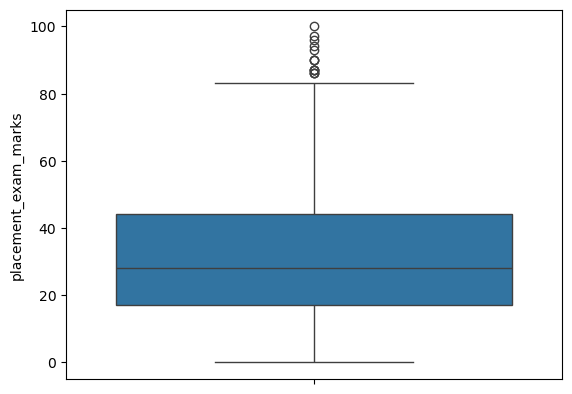

In [18]:
sns.boxplot(df['placement_exam_marks'])

In [20]:
percentile75 = df['placement_exam_marks'].quantile(0.75)
percentile25 = df['placement_exam_marks'].quantile(0.25)

In [22]:
percentile75

44.0

In [24]:
percentile25

17.0

In [26]:
iqr = percentile75 - percentile25

In [28]:
iqr

27.0

In [30]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [32]:
upper_limit

84.5

In [34]:
lower_limit

-23.5

# Finding Outliers


In [39]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [41]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


# Trimming

In [44]:
new_df = df[df['placement_exam_marks'] < upper_limit]

In [48]:
new_df.shape

(985, 3)

# Capping

In [67]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [69]:
new_df_cap.shape

(1000, 3)

In [71]:
new_df_cap['placement_exam_marks'].describe()

count    1000.000000
mean       32.136500
std        18.865419
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max        84.500000
Name: placement_exam_marks, dtype: float64